In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
df = pd.read_csv('Kickstarter Campaigns DataSet.csv' , index_col=0)
df.head()
df.describe()
nRow, nCol = df.shape

print(f'There are {nRow} rows and {nCol} columns')

df.columns
df.info()

There are 217245 rows and 18 columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 217245 entries, 0 to 217252
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             217245 non-null  int64  
 1   name           217245 non-null  object 
 2   currency       217245 non-null  object 
 3   launched_at    217245 non-null  object 
 4   backers_count  217245 non-null  int64  
 5   blurb          217245 non-null  object 
 6   country        217245 non-null  object 
 7   deadline       217245 non-null  object 
 8   slug           217245 non-null  object 
 9   status         217245 non-null  object 
 10  usd_pledged    217245 non-null  float64
 11  sub_category   217245 non-null  object 
 12  main_category  217245 non-null  object 
 13  creator_id     217245 non-null  int64  
 14  blurb_length   217245 non-null  int64  
 15  goal_usd       217245 non-null  float64
 16  city           217245 non-null  objec

In [3]:
df.columns

Index(['id', 'name', 'currency', 'launched_at', 'backers_count', 'blurb',
       'country', 'deadline', 'slug', 'status', 'usd_pledged', 'sub_category',
       'main_category', 'creator_id', 'blurb_length', 'goal_usd', 'city',
       'duration'],
      dtype='object')

In [4]:
print('duplicates', df.duplicated().sum())

duplicates 19527


In [5]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [6]:
print("length of dataset after removal of duplicates is ", len(df))

length of dataset after removal of duplicates is  197718


In [7]:
columns_to_drop = ['id', 'creator_id', 'currency', 'usd_pledged', 'blurb', 'deadline' ]

df=df.drop(columns=columns_to_drop, axis=1)

df.columns

Index(['name', 'launched_at', 'backers_count', 'country', 'slug', 'status',
       'sub_category', 'main_category', 'blurb_length', 'goal_usd', 'city',
       'duration'],
      dtype='object')

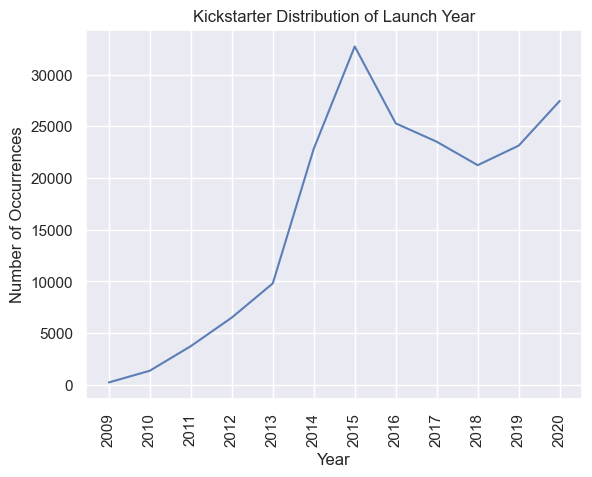

In [17]:
df['launched_at'] = df['launched_at'].str[:4]
year_count = df['launched_at'].value_counts().sort_index(ascending=True)



sns.set(style="darkgrid")
plt.plot(year_count.index, year_count, alpha=0.9)
plt.title('Kickstarter Distribution of Launch Year')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=90, horizontalalignment="center")
plt.show()

In [9]:
df['name_length'] = df['name'].apply(lambda x: len(x))
df=df.drop(['name'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197718 entries, 0 to 197717
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   launched_at    197718 non-null  object 
 1   backers_count  197718 non-null  int64  
 2   country        197718 non-null  object 
 3   slug           197718 non-null  object 
 4   status         197718 non-null  object 
 5   sub_category   197718 non-null  object 
 6   main_category  197718 non-null  object 
 7   blurb_length   197718 non-null  int64  
 8   goal_usd       197718 non-null  float64
 9   city           197718 non-null  object 
 10  duration       197718 non-null  float64
 11  name_length    197718 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 18.1+ MB


In [11]:
df['slug_length'] = df['slug'].str.count('-') + 1

In [12]:
df=df.drop(['slug'], axis=1)

In [13]:
df['launched_at'].sort_values(ascending=False)

61937     2020
145490    2020
46079     2020
46080     2020
145488    2020
          ... 
188079    2009
157726    2009
46084     2009
111585    2009
197276    2009
Name: launched_at, Length: 197718, dtype: object

In [14]:
(df['launched_at']==2015).value_counts()

False    197718
Name: launched_at, dtype: int64

In [15]:
df['main_category'].value_counts()

Web             3981
Comedy          3024
Accessories     2996
Illustration    2847
Shorts          2712
                ... 
Residencies       89
Letterpress       83
Games             80
Chiptune          53
Taxidermy         11
Name: main_category, Length: 159, dtype: int64